### Add a mask to the JRA-55 runoff dataset to make it work with the regional caribeean domain

This notebook reads the JRA-55 runoff dataset and adds a new variable (mask) that has zeros outside the regional caribeean domain. A similar procedure should be done with other runoff datasets. 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
#from cmip_basins.basins import generate_basin_codes

In [2]:
#path to original file from Who Kim
path = '/gpfs/fs1/p/cesm/omwg_dev/JRA55/domain/domain.190212/runoff_all.avg.nc'
ds = xr.open_dataset(path)

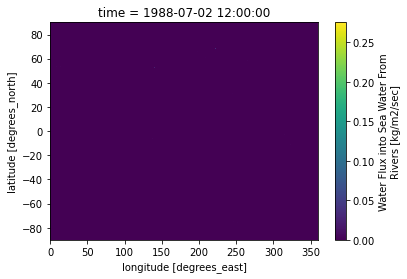

In [3]:
ds.rofl.plot()

In [4]:
# read caribeean domain
path = '/glade/work/gmarques/Projects/Carib_025/INPUT/CARIB_025_grid.nc'
carib = xr.open_dataset(path)

In [8]:
# lon should go from 0 to 360. Add + 180
max_lon = 360. + carib.tlon.max().values 
min_lon = 360. + carib.tlon.min().values 
max_lat = carib.tlat.max().values
min_lat = carib.tlat.min().values
print('max_lon = {}'.format(max_lon))
print('max_lat = {}'.format(max_lat))
print('min_lon = {}'.format(min_lon))
print('min_lat = {}'.format(min_lat))

max_lon = 324.375
max_lat = 31.875
min_lon = 261.625
min_lat = -5.875000000000001


### Select Caribeean domain within the JRA grid

In [9]:
ds1 = ds.copy()

In [11]:
ds1 = ds1.assign(mask=lambda ds1: ds1.rofi[0,:] * np.zeros(ds1.rofi.shape[1:]))

In [12]:
jm, im = ds1.mask.shape

In [13]:
for j in range(jm):
  for i in range(im):
    if (ds1.longitude[i] >= min_lon) and (ds1.longitude[i] <= max_lon):
      if (ds1.latitude[j] >= min_lat) and (ds1.latitude[j] <= max_lat):   
        ds1['mask'][j,i] = 1.0

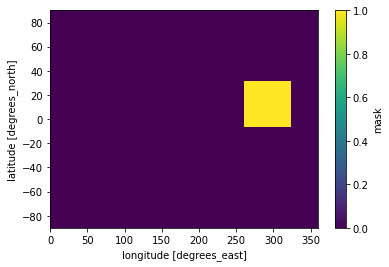

In [14]:
ds1.mask.plot()

In [16]:
fname = '/glade/work/gmarques/Projects/regional_caribeean_cesm/ncfiles/runoff_masked.nc'
ds1.to_netcdf(fname)